# Titanic

---

## 목적

타이타닉호의 생존률 예측

## 데이터 셋 정보 (Metadata)

The data has been split into two groups:

- **train.csv**: training data set
- **test.csv**: test data set

https://www.youtube.com/watch?v=wzuMnbKsq7U

---

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Pandas option
# pd.set_option('max_rows', 30)
# pd.set_option('max_columns', 15)

# 시각화 스타일 설정
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.grid'] = True


## 데이터 분석

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('Train shape : ', df_train.shape)
print('Test shape : ', df_test.shape)

Train shape :  (891, 12)
Test shape :  (418, 11)


In [5]:
print('=' * 20, 'Train Data Info', '=' * 20)
df_train.info()

print('')

print('=' * 20, 'Test Data Info', '=' * 20)
df_test.info()

==================== Train Data Info ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

==================== Test Data Info ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-N

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 상관계수

In [8]:
df_train[["Survived", "Pclass", "SibSp", "Parch", "Age", "Fare"]].corr()

,Survived,Pclass,SibSp,Parch,Age,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,-0.077221,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.369226,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,-0.308247,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,-0.189119,0.216225
Age,-0.077221,-0.369226,-0.308247,-0.189119,1.000000,0.096067
Fare,0.257307,-0.549500,0.159651,0.216225,0.096067,1.000000


### headmap

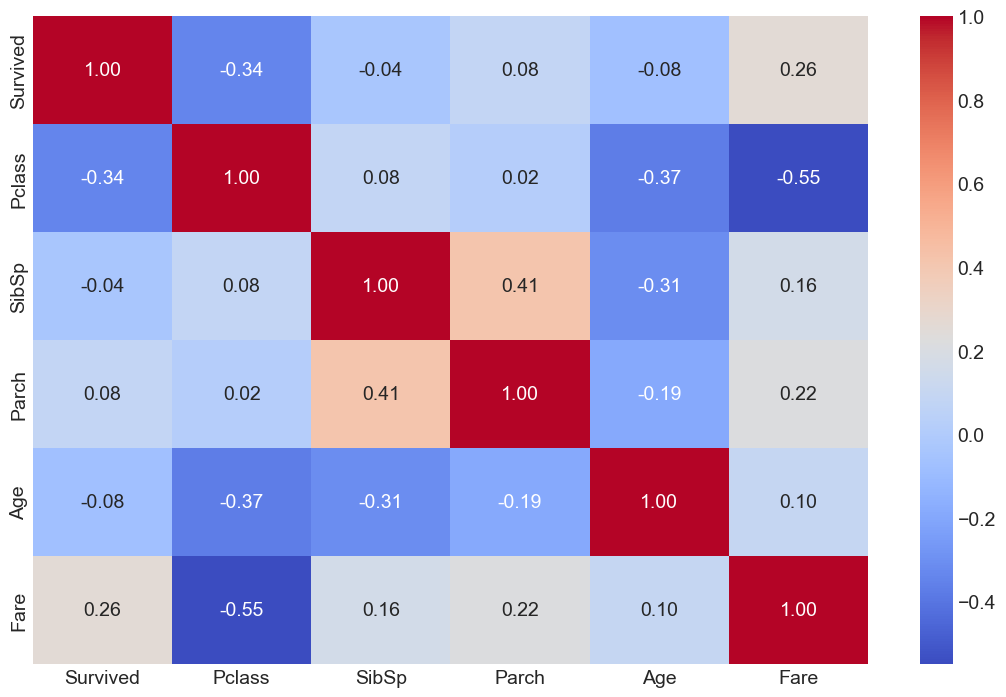

In [9]:
sns.heatmap(
    df_train[["Survived","Pclass","SibSp","Parch","Age","Fare"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
);

### 탑승항(Embarked)

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  'Embarked'에는 어떤 값들이 존재하고 각각의 값들의 개수는 몇개일까?

In [11]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

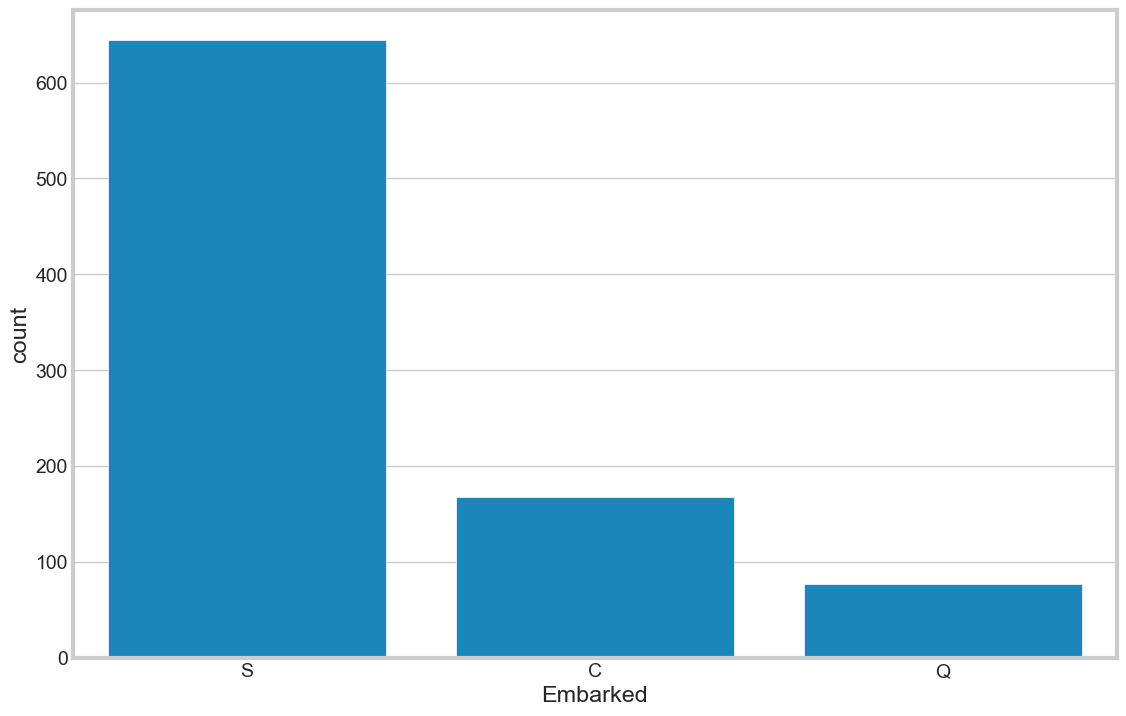

In [12]:
sns.countplot(x='Embarked', data=df_train)

### Embarked 결측치 채우기

In [13]:
# Embarked 비율(백분율)
df_train['Embarked'].value_counts() / df_train.shape[0] * 100

Embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64

In [14]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [15]:
df_train['Embarked'].isnull().any()

False

[참조: seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

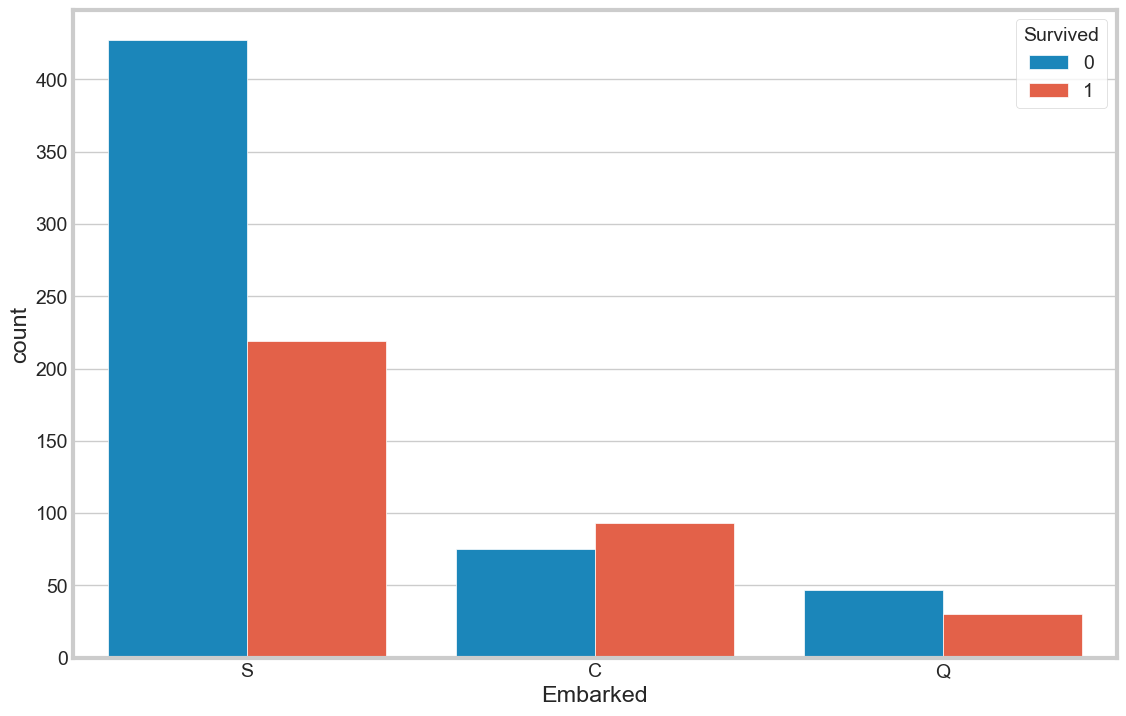

In [16]:
sns.countplot(x='Embarked', hue='Survived', data=df_train);

### Factor 별 생존율 분석

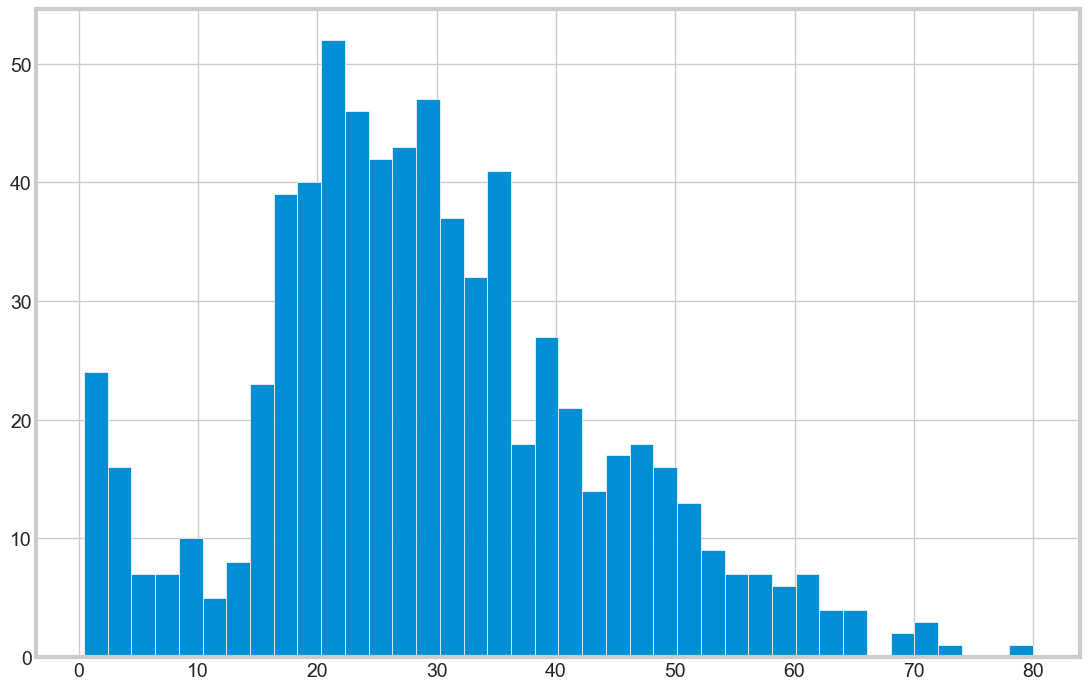

In [17]:
df_train['Age'].hist(bins=40);

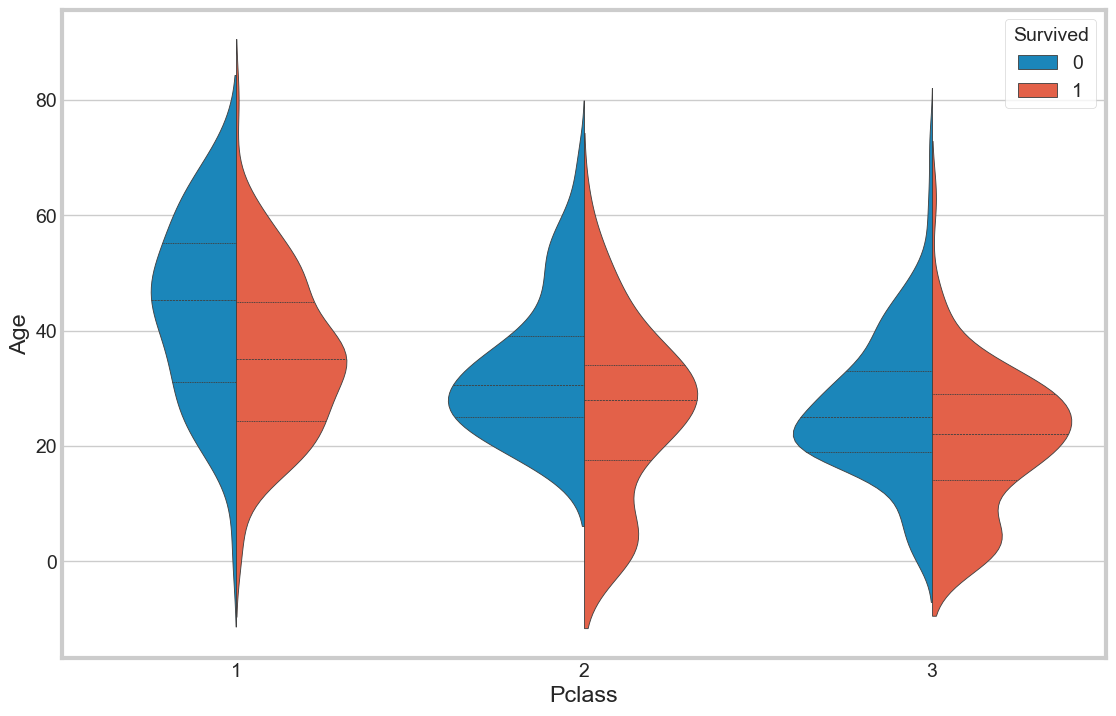

In [18]:
sns.violinplot(x='Pclass', 
               y='Age', 
               hue='Survived', 
               data=df_train, 
               split=True, 
               inner="quartile");

#### Pclass vs Survived: Crosstab

In [19]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### Pclass vs Survived: countplot

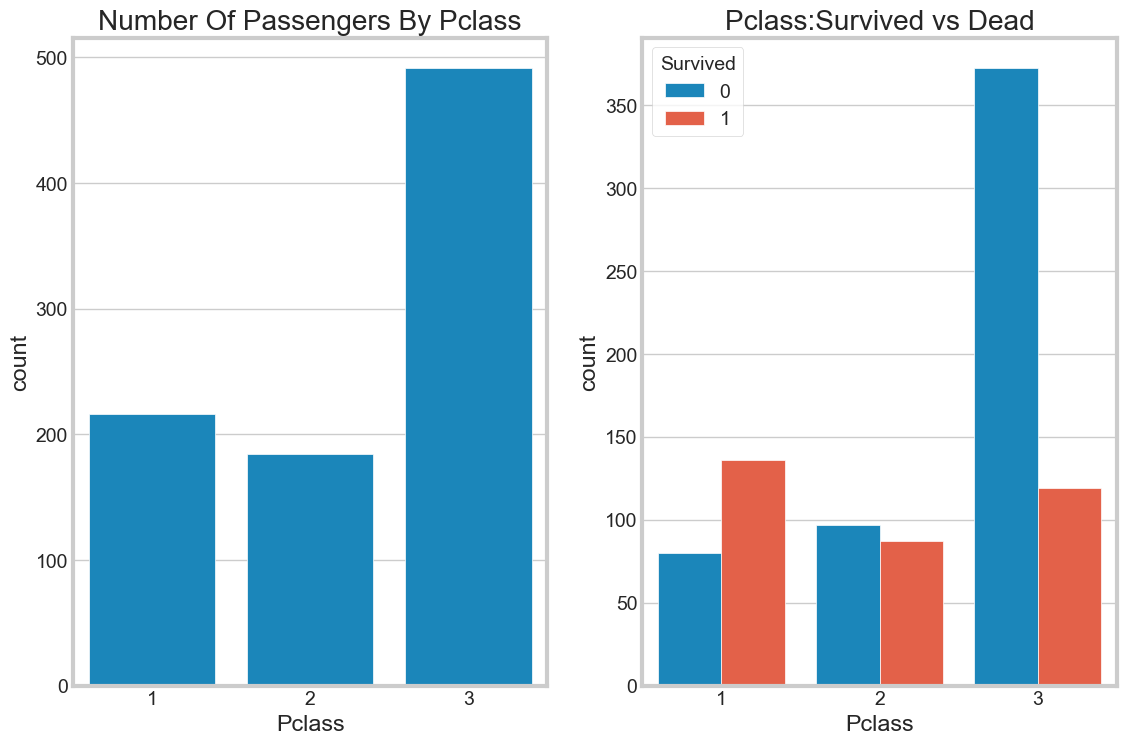

In [20]:
f, ax = plt.subplots(1, 2, figsize=(12,8))

# ax[0]: matplotlib
#df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
#ax[0].set_title('Number Of Passengers By Pclass')
#ax[0].set_xlabel('Pclass')
#ax[0].set_ylabel('Count')

# ax[0]: seaborn
sns.countplot(x='Pclass', data=df_train, ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')

# ax[1]: seaborn
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show();

#### 탑승항('Embarked')별 생존자

> 1. 탑승항('Embarked')을 기준으로 승객을 분류하여
> 2. 각각의 승객의 나이에 따른 
> 3. 생존 여부를 violinplot 그래프를 이용해서 표현해보자.

<Axes: xlabel='Embarked', ylabel='Age'>

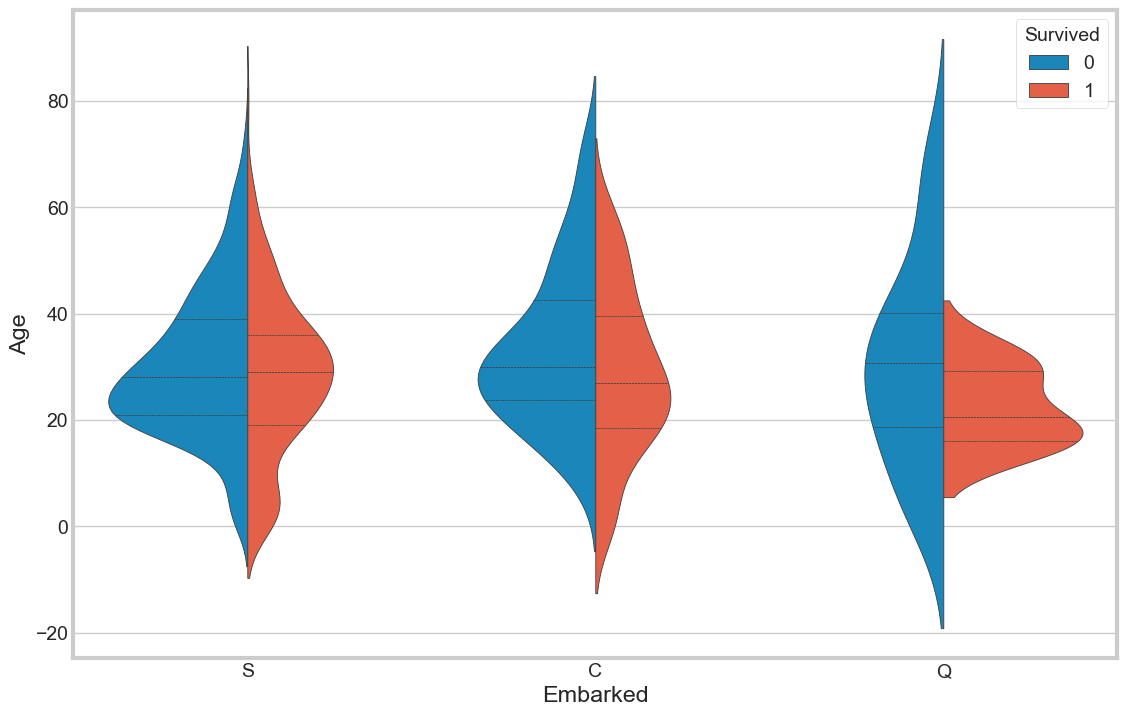

In [21]:
sns.violinplot(x='Embarked', y='Age', hue='Survived', data=df_train, split=True, inner="quartile")

> 1. 성별('Sex')을 기준으로 승객을 분류하여 
> 2. 각각의 승객의 나이에 따른 
> 3. 생존 여부를 그래프로 표현해보자. 

> **성별에 따른 생존율의 차이가 나타나는가?**

<Axes: xlabel='Sex', ylabel='Age'>

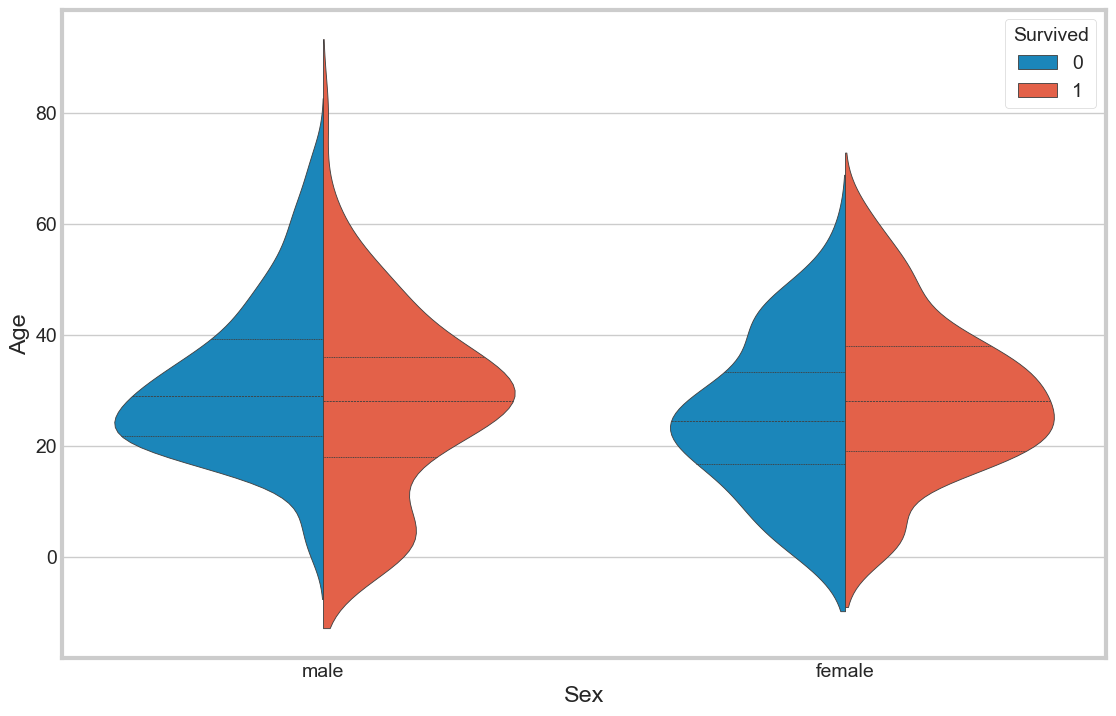

In [22]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, split=True, inner="quartile")

> Q. **성별('Sex')에 따른 승객의 생존자 수를 crosstab으로 표현해보자. 성별에 따른 생존율의 차이가 나타나는가?**

In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Age 결측치 채우기

In [24]:
# Age 결측치 비율(백분율)
df_train['Age'].isnull().sum() / len(df_train['Age']) * 100

19.865319865319865

In [25]:
# 나이 평균
df_train['Age'].mean()

29.69911764705882

In [26]:
# 나이 중앙값
df_train['Age'].median()

28.0

In [27]:
# 나이 최빈값
df_train['Age'].mode()

0    24.0
Name: Age, dtype: float64

#### 성별에 따른 나이 평균, 중앙값

In [28]:
# 남자 나이 평균
df_train[df_train['Sex'] == 'male'].Age.mean()

30.72664459161148

In [29]:
# 여자 나이 평균
df_train[df_train['Sex'] == 'female']['Age'].mean()

27.915708812260537

In [30]:
# 남자 나이 중앙값
df_train[df_train['Sex']=='male']['Age'].median()

29.0

In [31]:
# 여자 나이 중앙값
df_train[df_train['Sex']=='female']['Age'].median()

27.0

#### 선실 등급('Pclass')별 나이 중앙값

In [32]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [33]:
# Pclass 1 나이 중앙값
df_train[df_train['Pclass'] == 1]['Age'].median()

37.0

In [34]:
# Pclass 2 나이 중앙값
df_train[df_train['Pclass']==2]['Age'].median()

29.0

In [35]:
# Pclass 3 나이 중앙값
df_train[df_train['Pclass']==3]['Age'].median()

24.0

#### 성별(Sex), 선실 등급(Pclass)별 나이 중앙값

In [36]:
# 나이 중앙값: 남자, Pclass 1
df_train[(df_train['Sex']=='male') & (df_train['Pclass']==1)]['Age'].median()

40.0

In [37]:
# 나이 중앙값: 남자, Pclass 2
df_train[(df_train['Sex']=='male') & (df_train['Pclass']==2)]['Age'].median()

30.0

In [38]:
# 나이 중앙값: 남자, Pclass 3
df_train[(df_train['Sex']=='male') & (df_train['Pclass']==3)]['Age'].median()

25.0

In [39]:
# 나이 중앙값: 여자, Pclass 1
df_train[(df_train['Sex']=='female') & (df_train['Pclass']==1)]['Age'].median()

35.0

In [40]:
# 나이 중앙값: 여자, Pclass 2
df_train[(df_train['Sex']=='female') & (df_train['Pclass']==2)]['Age'].median()

28.0

In [41]:
# 나이 중앙값: 여자, Pclass 3
df_train[(df_train['Sex']=='female') & (df_train['Pclass']==3)]['Age'].median()

21.5

#### Age 결측치 채우기

In [42]:
med_m_1 = df_train[(df_train['Sex']=='male')   & (df_train['Pclass']==1)]['Age'].median()
med_m_2 = df_train[(df_train['Sex']=='male')   & (df_train['Pclass']==2)]['Age'].median()
med_m_3 = df_train[(df_train['Sex']=='male')   & (df_train['Pclass']==3)]['Age'].median()
med_f_1 = df_train[(df_train['Sex']=='female') & (df_train['Pclass']==1)]['Age'].median()
med_f_2 = df_train[(df_train['Sex']=='female') & (df_train['Pclass']==2)]['Age'].median()
med_f_3 = df_train[(df_train['Sex']=='female') & (df_train['Pclass']==3)]['Age'].median()

In [43]:
df_train['Age'].isnull().sum()

177

In [44]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')  &(df_train['Pclass']==1),'Age'] = med_m_1
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')  &(df_train['Pclass']==2),'Age'] = med_m_2
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')  &(df_train['Pclass']==3),'Age'] = med_m_3
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==1),'Age'] = med_f_1
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==2),'Age'] = med_f_2
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==3),'Age'] = med_f_3

In [45]:
df_train['Age'].isnull().sum()

0

In [46]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Cabin 데이터 확인

In [47]:
df_train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [48]:
df_train['Cabin'].sample(30)

309            E36
63             NaN
734            NaN
761            NaN
490            NaN
242            NaN
745            B22
679    B51 B53 B55
811            NaN
801            NaN
684            NaN
376            NaN
122            NaN
513            NaN
812            NaN
530            NaN
418            NaN
238            NaN
383            NaN
399            NaN
701            E24
697            NaN
737           B101
471            NaN
146            NaN
823           E121
443            NaN
89             NaN
616            NaN
188            NaN
Name: Cabin, dtype: object

#### Cabin 삭제

In [49]:
df_train.drop(['Cabin'], axis=1, inplace=True)

#### 생존여부와 다른 컬럼들과 연관성 파악

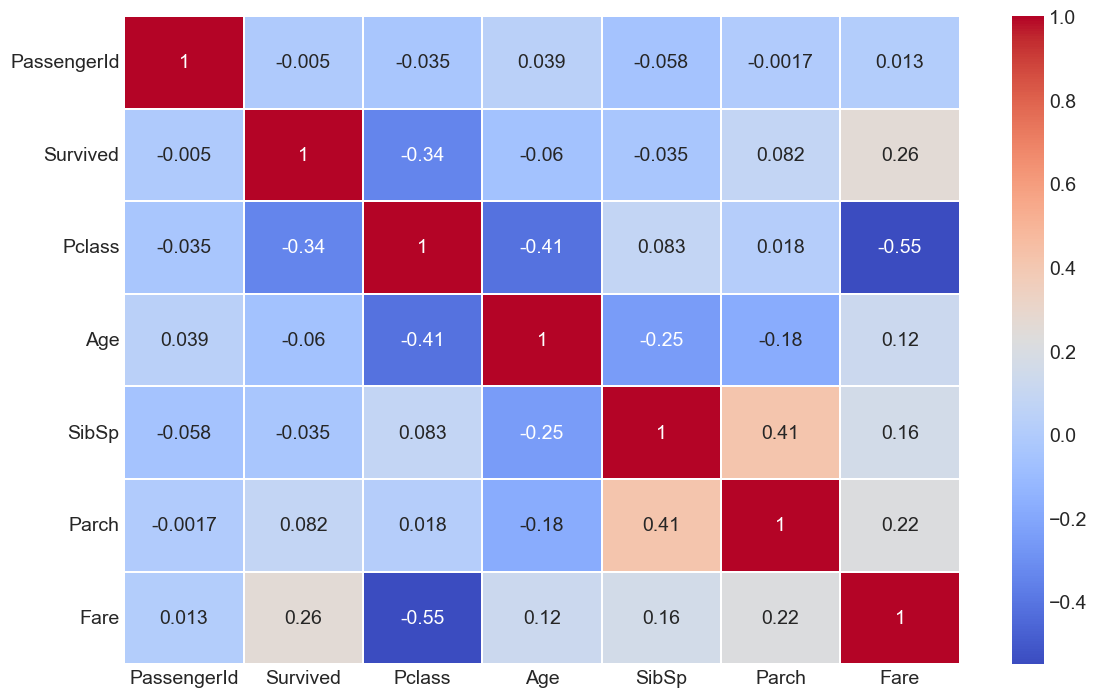

In [50]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.2);

<img src='data/titanic_meta1.png'>

#### 삭제: PassengerId, Name, Ticket

In [51]:
df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

> 기존 데이터 셋의 정보를 이용하여 새로운 컬럼을 추가해보자(Feature Engineering!)

#### 컬럼 추가: Fsize = SibSp + Parch

In [52]:
df_train['Fsize'] = df_train['SibSp'] + df_train['Parch'] + 1

#### 컬럼 삭제: SibSp, Parch

In [53]:
df_train.drop(['SibSp','Parch'], axis=1, inplace=True)

#### 상관관계 히트맵

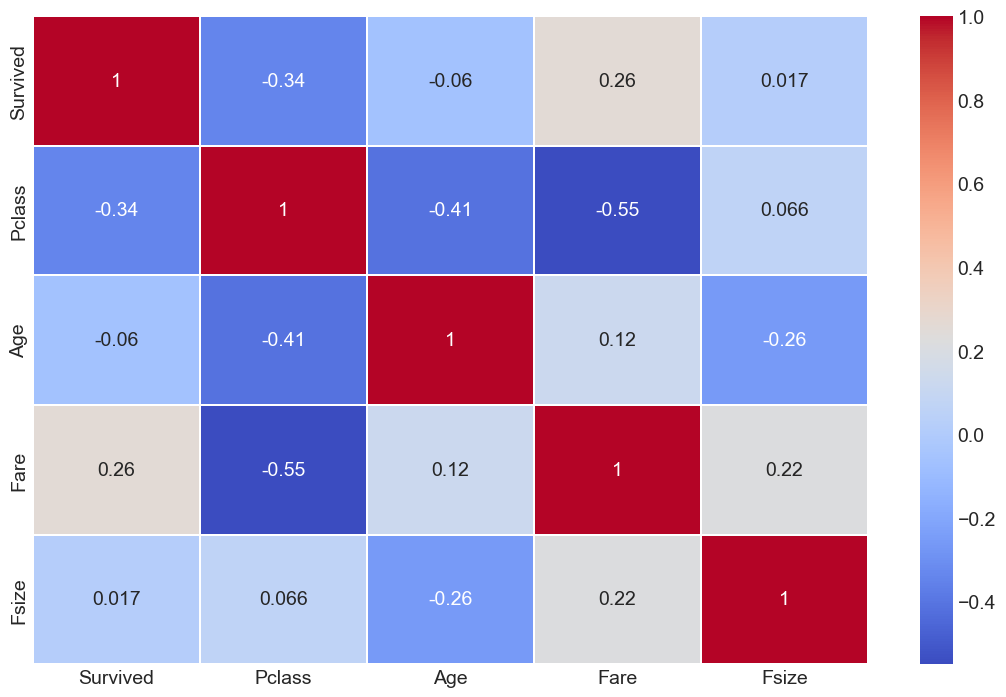

In [54]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.2);

In [55]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Fsize'], dtype='object')

In [56]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fsize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


---

## 머신러닝

### 문자열을 숫자로 치환

In [57]:
df_train['Sex'] = df_train['Sex'].replace(['male','female'], [0, 1])
df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'], [0, 1, 2])

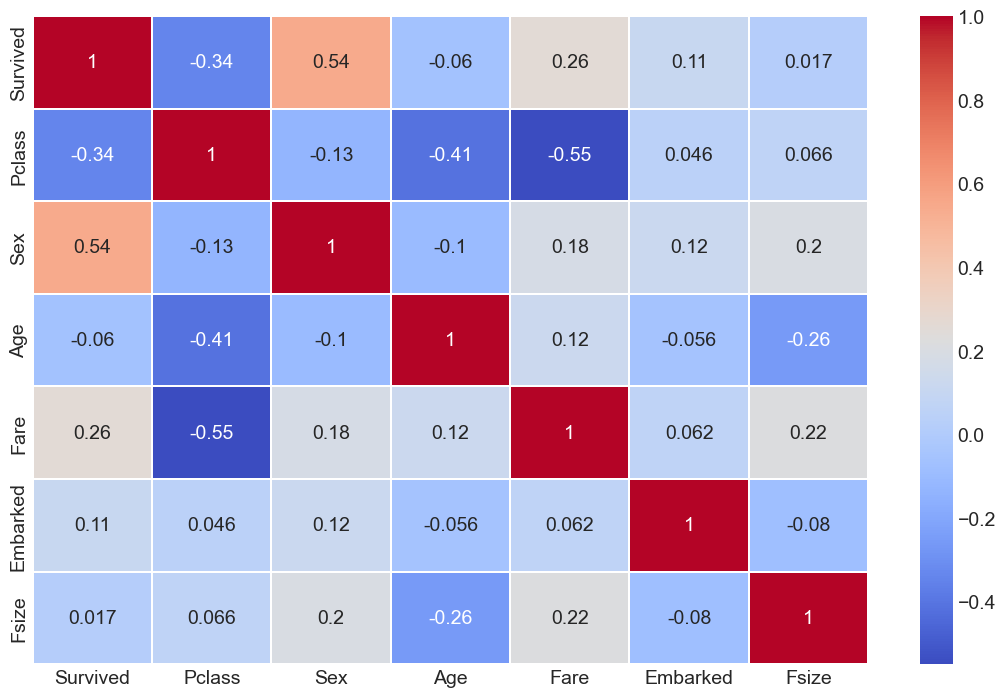

In [58]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.2);

### 생존여부 예측

In [59]:
# Machine Learning Library

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# accuracy measure
from sklearn import metrics

#### 데이터 분리: 학습 데이터 + 테스트 데이터

In [60]:
train, test = train_test_split(
    df_train, test_size=0.3, random_state=123, stratify=df_train['Survived'])
train.head()
test.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fsize
178,0,2,0,30.0,13.0000,0,1
457,1,1,1,35.0,51.8625,0,2
16,0,3,0,2.0,29.1250,2,6
95,0,3,0,25.0,8.0500,0,1
120,0,2,0,21.0,73.5000,0,3


#### 학습 데이터

In [61]:
# 독립변수(Feature)
X_train = train[train.columns[1:]]

# 종속변수(Target): Survived(1 or 0)
y_train = train[train.columns[:1]]

X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Fsize
199,2,1,24.0,13.000,0,1
468,3,0,25.0,7.725,2,1
198,3,1,21.5,7.750,2,1
574,3,0,16.0,8.050,0,1
776,3,0,25.0,7.750,2,1


#### 테스트 데이터

In [62]:
# 독립변수(Feature)
X_test = test[test.columns[1:]]
#X_test = test.iloc[:,1:]

# 종속변수(Target): Survived(1 or 0)
y_test = test[test.columns[:1]]

X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Fsize
178,2,0,30.0,13.0000,0,1
457,1,1,35.0,51.8625,0,2
16,3,0,2.0,29.1250,2,6
95,3,0,25.0,8.0500,0,1
120,2,0,21.0,73.5000,0,3


In [95]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Fsize
178,2,0,30.0,13.0000,0,1
457,1,1,35.0,51.8625,0,2
16,3,0,2.0,29.1250,2,6
95,3,0,25.0,8.0500,0,1
120,2,0,21.0,73.5000,0,3
...,...,...,...,...,...,...
429,3,0,32.0,8.0500,0,1
615,2,1,24.0,65.0000,0,4
860,3,0,41.0,14.1083,0,3
660,1,0,50.0,133.6500,0,3


In [94]:
y_test

,Survived
178,0
457,1
16,0
95,0
120,0
...,...
429,1
615,1
860,0
660,1


#### 1. Logistic Regression

In [63]:
# 모델 생성
model = LogisticRegression()

In [64]:
# 모델 학습
#model.fit(X_train, y_train)
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [65]:
# 결과 예측
prediction1 = model.predict(X_test)
prediction1

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [66]:
# 정확도 확인
print('Accuracy - Logistic Regression:', metrics.accuracy_score(prediction1, y_test))

Accuracy - Logistic Regression: 0.7873134328358209


In [67]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       165
           1       0.75      0.67      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.79      0.78       268



In [68]:
# Confusion Matrix
pd.crosstab(prediction1, y_test['Survived'], margins=True)

Survived,0,1,All
row_0,,,
0,142,34,176
1,23,69,92
All,165,103,268


#### 2. Support Vector Machine

In [69]:
# 모델 생성
model = SVC(kernel='linear', C=0.1, gamma=0.1)

In [70]:
# 모델 학습
#model.fit(X_train, y_train)
model.fit(X_train, y_train.values.ravel())

SVC(C=0.1, gamma=0.1, kernel='linear')

In [71]:
# 결과 예측
prediction2 = model.predict(X_test)
prediction2

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [72]:
# 정확도 확인
print('Accuracy - SVM:', metrics.accuracy_score(prediction2, y_test))

Accuracy - SVM: 0.7611940298507462


In [73]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       165
           1       0.71      0.64      0.67       103

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [74]:
# Confusion Matrix
pd.crosstab(prediction2, y_test['Survived'], margins=True)

Survived,0,1,All
row_0,,,
0,138,37,175
1,27,66,93
All,165,103,268


#### 3. Decision Tree

In [75]:
# 모델 생성
model = DecisionTreeClassifier()

In [76]:
# 모델 학습
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
# 결과 예측
prediction3 = model.predict(X_test)
prediction3

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [78]:
# 정확도 확인
print('Accuracy - Decision Tree:', metrics.accuracy_score(prediction3, y_test))

Accuracy - Decision Tree: 0.7686567164179104


In [79]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       165
           1       0.70      0.69      0.70       103

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [80]:
# Confusion Matrix
pd.crosstab(prediction3, y_test['Survived'], margins=True)

Survived,0,1,All
row_0,,,
0,135,32,167
1,30,71,101
All,165,103,268


#### 4. Random Forest

In [81]:
# 모델 생성
model = RandomForestClassifier(n_estimators=340)

In [82]:
# 모델 학습
#model.fit(X_train, y_train)
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=340)

In [83]:
# 결과 예측
prediction4 = model.predict(X_test)
prediction4

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [84]:
# 정확도 확인
print('Accuracy - Random Forests:', metrics.accuracy_score(prediction4, y_test))

Accuracy - Random Forests: 0.7798507462686567


In [85]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       165
           1       0.72      0.70      0.71       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [86]:
# Confusion Matrix
pd.crosstab(prediction4, y_test['Survived'], margins=True)

Survived,0,1,All
row_0,,,
0,137,31,168
1,28,72,100
All,165,103,268


#### 5. 하이퍼 파라미터 튜닝(매개변수 최적화)

In [87]:
# 학습 데이터와 테스트 데이터를 나누지 않음

X = df_train[df_train.columns[1:]]
#X = df_train.iloc[:,1:]

y = df_train['Survived']

In [88]:
# Grid Search
from sklearn.model_selection import GridSearchCV

In [89]:
# 매개 변수 설정
n_estimators = range(10, 500, 10)
hyperparam = {'n_estimators': n_estimators}

In [90]:
# 모델 생성
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=hyperparam, cv=2)

In [91]:
%%time
# 모델 학습
gs.fit(X,y)

CPU times: total: 49.8 s
Wall time: 50.3 s


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=123),
             param_grid={'n_estimators': range(10, 500, 10)})

In [92]:
# 모델 성능 확인
gs.best_score_

0.7934902000302313

In [93]:
# 최적의 매개변수 확인
gs.best_estimator_

RandomForestClassifier(n_estimators=340, random_state=123)

---

In [ ]:
# End of file